# Enhancing Insurance Operations with Machine Learning

The insurance industry faces numerous challenges that can benefit from the application of machine learning. Sure Tomorrow, an insurance company, seeks to leverage machine learning to improve client targeting, enhance claim prediction accuracy, estimate claim sizes, and protect sensitive client data. This project addresses these challenges through practical tasks, aiming to demonstrate how machine learning can drive operational efficiency and improve decision-making while maintaining robust data security measures.

Tasks:

- Identify clients similar to specified criteria to enhance targeted marketing efforts.
- Predict the likelihood of new clients making insurance claims and compare model predictions against a dummy baseline.
- Estimate the size of potential insurance claims using a linear regression model.
- Develop data transformation algorithms to protect client information through data obfuscation, ensuring model performance is not compromised.

# Data Pre-processing & Exploration

## Initialization

In [1]:
#pip install scikit-learn --upgrade

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from IPython.display import display

## Data Import

Import data and perform checks to ensure the data is free from problems.

In [ ]:
try:
    # Try loading the file from your laptop path
    data = pd.read_csv('C:/Users/Eugene/Documents/GitHub/TripleTen-Projects/11. Sure Tomorrow Insurance Analysis/insurance_us.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    data = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/11. Sure Tomorrow Insurance Analysis/insurance_us.csv')

Renamed the columns to make the code look more consistent with the style.

In [4]:
data = data.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'salary', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
data.sample(10)

,gender,age,salary,family_members,insurance_benefits
3211,0,31.0,40100.0,0,0
1832,0,24.0,26300.0,2,0
3538,0,24.0,30300.0,2,0
406,1,36.0,41300.0,0,0
1604,0,26.0,43400.0,1,0
3693,1,30.0,41500.0,1,0
3246,1,28.0,33600.0,1,0
2641,0,32.0,28300.0,1,0
299,0,39.0,43500.0,3,0
4702,0,33.0,33700.0,2,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   salary              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
data['age'] = data['age'].astype('int64')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   salary              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
data.describe()

,gender,age,salary,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


From the data description above, we can gain the following insights:

- In the age and income columns, the standard deviation values are significantly far from the mean values. This indicates that the data in these columns have low variability.
- Regarding quartile values, in the gender column, there are more 0 values than 1 values. And the age group that claims insurance the most falls within the range of 24 to 30 years.
- As for the salary values, the lowest salary claimed for insurance is at least 46,600. Based on the number of family members, those who claim insurance the least are already married or have a family.

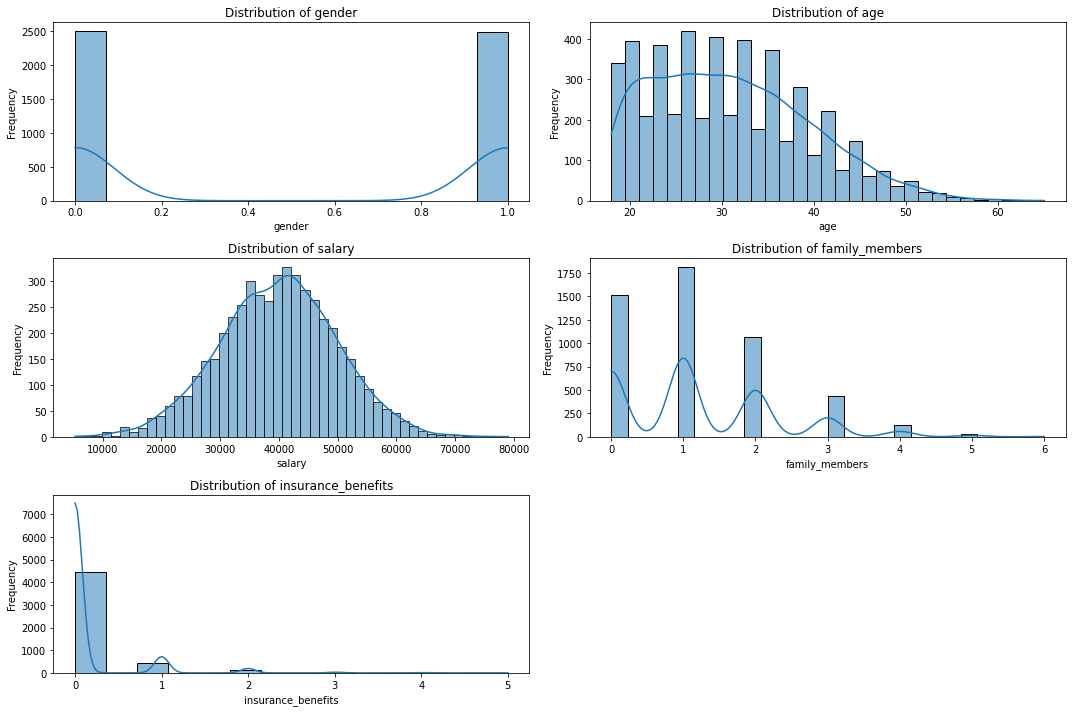

In [10]:
plt.figure(figsize=(15, 10))

for column in data.columns:
    plt.subplot(3, 2, data.columns.get_loc(column) + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()


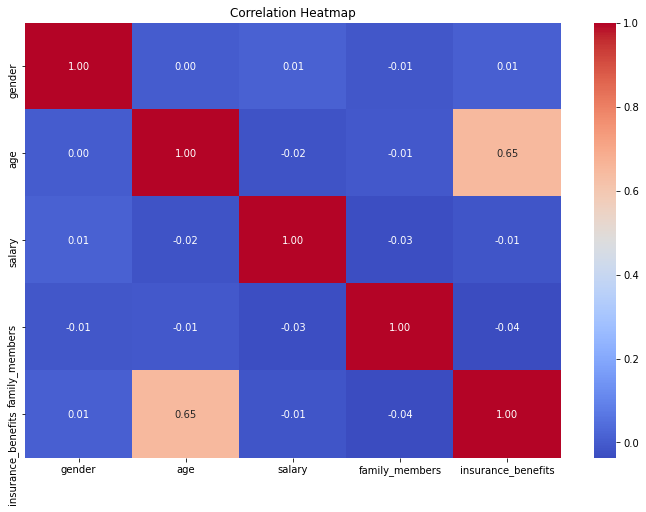

In [11]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Exploratory Data Analysis

Checking is there a specific customer group by looking at the pair plot

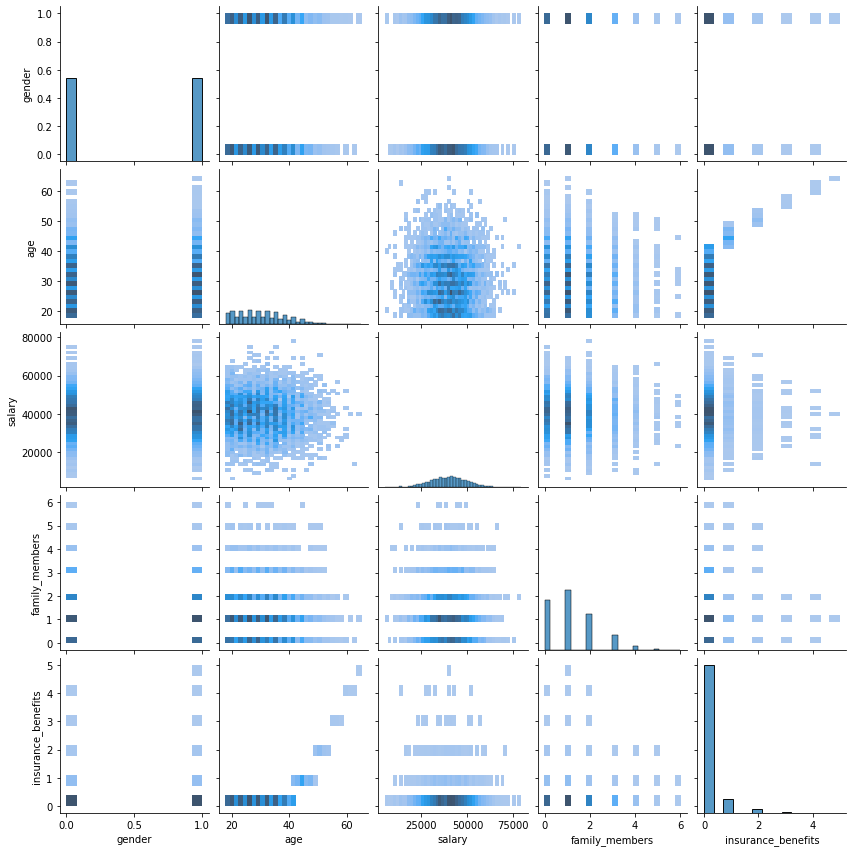

In [12]:
g = sns.pairplot(data, kind='hist')
g.fig.set_size_inches(12, 12)

It seems a bit difficult to see clear groups (clusters) considering the difficulty of combining several variables together (to analyze multivariate distributions). However, that's what Linear Algebra and Machine Learning are for here.

# Task 1. Similar Clients

In the Machine Learning programming language, it is important to develop a procedure that can determine *k-nearest neighbors* (objects) for a particular object based on the distance between objects.

You may want to review the following lesson (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To accomplish this task, we can try several distance metrics.

Create a function that returns the *k-nearest neighbors* for the nth object based on a certain distance metric.  The amount of insurance claims received does not need to be taken into account in this task.

You can use the kNN algorithm implementation already available in Scikit-learn (check this [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) ) or use your own.

Test the algorithm for four combinations of two cases
- Scaling
  - data is not scaled
  - data scaled with [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Distance Metrics
  - Euclid
  - Manhattan

Answer the following questions:
- Does unscaled data affect the kNN algorithm? If it is influential, then what form does it take?
- How similar are the results you get from the Euclidean metric to when you use the Manhattan distance metric (ignoring the presence or absence of scales)?

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [14]:
def get_knn(df, n, k, metric):
    
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute', metric=metric).fit(data[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    data_res = pd.concat([
        data.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return data_res

Set data scale.

In [15]:
feature_names = ['gender', 'age', 'salary', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(data[feature_names].to_numpy())

data_scaled = data.copy()
data_scaled.loc[:, feature_names] = transformer_mas.transform(data[feature_names].to_numpy())

In [16]:
data_scaled.sample(5)

,gender,age,salary,family_members,insurance_benefits
4041,1.0,0.553846,0.443038,0.166667,0
4913,1.0,0.415385,0.417722,0.333333,0
3080,0.0,0.476923,0.368354,0.166667,0
4782,0.0,0.384615,0.515190,0.000000,0
3555,0.0,0.446154,0.430380,0.333333,0


Now, let's get similar records for each existing combination.

In [17]:
n = np.random.randint(0, len(data_scaled))
print(n)

2766


In [18]:
get_knn(data, n, 5, 'manhattan')

,gender,age,salary,family_members,insurance_benefits,distance
2766,1,35,32400.0,2,0,0.0
3310,1,35,32400.0,3,0,1.0
229,1,33,32400.0,2,0,2.0
1630,1,34,32400.0,1,0,2.0
4100,0,33,32400.0,0,0,5.0


In [19]:
get_knn(data, n, 5, 'manhattan')


,gender,age,salary,family_members,insurance_benefits,distance
2766,1,35,32400.0,2,0,0.0
3310,1,35,32400.0,3,0,1.0
229,1,33,32400.0,2,0,2.0
1630,1,34,32400.0,1,0,2.0
4100,0,33,32400.0,0,0,5.0


In [20]:
get_knn(data_scaled, n, 5, 'euclidean')

,gender,age,salary,family_members,insurance_benefits,distance
726,1,20,5300.0,1,0,5299.625649
4164,1,40,6000.0,1,0,5999.719686
4623,0,41,7400.0,0,0,7399.700571
437,0,28,8900.0,4,0,8899.633054
483,0,29,9800.0,2,0,9799.631397


In [21]:
get_knn(data_scaled, n, 5, 'manhattan')

,gender,age,salary,family_members,insurance_benefits,distance
726,1,20,5300.0,1,0,5319.718079
4164,1,40,6000.0,1,0,6039.718079
4623,0,41,7400.0,0,0,7441.384745
437,0,28,8900.0,4,0,8931.718079
483,0,29,9800.0,2,0,9830.718079


**Does unscaled data affect the kNN algorithm? If it does, what is the impact?** 

Unscaled data does affect the kNN algorithm. When we look at unscaled data, the shape of the distance is larger, and this significantly impacts the performance of kNN. In contrast, for scaled data sets, the distances are smaller and not spread out as much.

**How similar are the results you obtained using the Euclidean metric compared to when you used the Manhattan distance metric (regardless of scaling)?** 

The results from both metrics are very similar. There is no difference in the outcomes of the two metrics, as the only distinction between them is how they calculate distance.

In [22]:
x = data[['age', 'salary', 'family_members']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [24]:
data['Cluster'] = kmeans.labels_

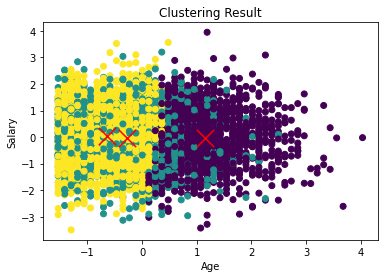

In [25]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=300, c='red')
plt.title('Clustering Result')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [26]:
cluster_number = 0
clients_in_cluster = data[data['Cluster'] == cluster_number]
print("Client within Cluster", cluster_number)
clients_in_cluster.sample(10)

Client within Cluster 0


,gender,age,salary,family_members,insurance_benefits,Cluster
3101,1,36,35000.0,1,0,0
206,1,36,26000.0,1,0,0
2056,1,44,29900.0,1,1,0
2421,0,42,57600.0,0,1,0
3646,0,50,45900.0,1,2,0
3017,0,40,46200.0,1,0,0
1489,0,48,37800.0,0,1,0
169,1,38,40700.0,1,0,0
4180,1,37,35800.0,1,0,0
478,1,53,32500.0,1,2,0


In [27]:
cluster_number = 1
clients_in_cluster = data[data['Cluster'] == cluster_number]
print("Client within Cluster", cluster_number)
clients_in_cluster.sample(10)

Client within Cluster 1


,gender,age,salary,family_members,insurance_benefits,Cluster
4127,0,20,38400.0,4,0,1
2670,0,26,41600.0,3,0,1
1907,1,21,41200.0,4,0,1
1563,1,36,39100.0,2,0,1
3566,0,44,44700.0,3,1,1
2920,0,35,56400.0,3,0,1
1342,1,50,45900.0,5,2,1
2096,0,23,40500.0,3,0,1
4316,0,36,44300.0,2,0,1
2392,1,25,43500.0,2,0,1


In [28]:
cluster_number = 2
clients_in_cluster = data[data['Cluster'] == cluster_number]
print("Client within Cluster", cluster_number)
clients_in_cluster.sample(10)

Client within Cluster 2


,gender,age,salary,family_members,insurance_benefits,Cluster
2955,1,32,21600.0,0,0,2
3393,1,28,28400.0,1,0,2
1499,0,21,35200.0,1,0,2
3364,1,21,24300.0,1,0,2
3764,0,29,36400.0,0,0,2
966,1,20,44500.0,0,0,2
2709,1,22,46700.0,0,0,2
1448,0,20,54900.0,1,0,2
1109,1,29,28900.0,0,0,2
3781,0,32,42100.0,0,0,2


In [29]:
data = data.drop(['Cluster'], axis = 1)

# Task 2. Is the client likely to receive an insurance claim?

In the context of *machine learning*, this task is the same as a binary classification task.

With a target insurance_benefits greater than zero, try to evaluate whether the kNN classification model is a better approach than the *dummy* model.

Instructions:
- Create a KNN based classifier and measure its quality with F1 metric for k=1..10 for original and scaled data. It will be interesting to see how k can affect the evaluation metrics, and whether scaling the data makes the results different. Use the kNN classification algorithm implementation available in Scikit-learn (check [this link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Create a random *dummy* model for this case. The model should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit; 0.5; 1.

The probability of paying an insurance claim can be defined as

$$
P\{\text{insurance claims received}\}=\frac{\text{number of clients who received insurance claims}}{\text{total number of clients}}.
$$

Split the entire data into 70:30 for the proportion of *training* and *test set*.

In [30]:
data['insurance_benefits_received'] = (data['insurance_benefits'] > 0).astype('int64')
data.head()

,gender,age,salary,family_members,insurance_benefits,insurance_benefits_received
0,1,41,49600.0,1,0,0
1,0,46,38000.0,1,1,1
2,0,29,21000.0,0,0,0
3,0,21,41700.0,2,0,0
4,1,28,26100.0,0,0,0


0    4436
1     564
Name: insurance_benefits_received, dtype: int64


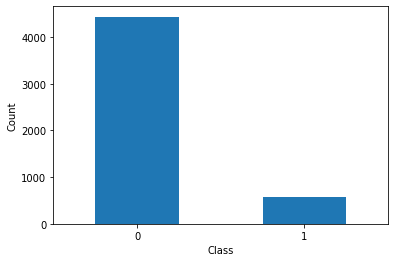

In [31]:
class_counts = data['insurance_benefits_received'].value_counts()
print(class_counts)

class_counts.plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=360)
plt.show()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       5000 non-null   int64  
 1   age                          5000 non-null   int64  
 2   salary                       5000 non-null   float64
 3   family_members               5000 non-null   int64  
 4   insurance_benefits           5000 non-null   int64  
 5   insurance_benefits_received  5000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [33]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matrix of Errors')
    print(cm)

In [34]:
def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [35]:
for P in [0, data['insurance_benefits_received'].sum() / len(data), 0.5, 1]:

    print(f'Probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(data))
        
    eval_classifier(data['insurance_benefits_received'], y_pred_rnd)
    
    print()

Probability: 0.00
F1: 0.00
Matrix of Errors
[[0.8872 0.    ]
 [0.1128 0.    ]]

Probability: 0.11
F1: 0.12
Matrix of Errors
[[0.7914 0.0958]
 [0.0994 0.0134]]

Probability: 0.50
F1: 0.20
Matrix of Errors
[[0.456  0.4312]
 [0.053  0.0598]]

Probability: 1.00
F1: 0.20
Matrix of Errors
[[0.     0.8872]
 [0.     0.1128]]



Based on the information above, it can be concluded that:

- For a probability of 0, the F1 score obtained is 0, which means the model performs poorly in predicting positive values. We can see a very high value for true negatives.
- For a probability of 0.11, the F1 score obtained is 0.12, indicating that the model's performance is still relatively poor in predicting positive values. It can be observed that the true negatives are much higher compared to the true positives.
- For a probability of 0.5, an F1 score of 0.20 is obtained. The model still performs poorly because it predicts more true negatives.
- For a probability of 1, the F1 score obtained is 0.20. The model performs well in predicting positive values. However, it predicts more false positives.

The above observations can occur because the data or target variable has imbalanced classes between class 0 and 1.

In [36]:
x = data[['gender', 'age', 'salary', 'family_members']]
y = data['insurance_benefits']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [39]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = model.predict(x_test_scaled)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Model Accuracy:", accuracy)

Logistic Regression Model Accuracy: 0.984


In [42]:
dummy_accuracy = accuracy_score(y_test, [0] * len(y_test)) 
print("Dummy Model Accuracy:", dummy_accuracy)

Dummy Model Accuracy: 0.891


In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[891   0   0   0   0   0]
 [  6  72   0   0   0   0]
 [  0   2  21   0   0   0]
 [  0   0   5   0   0   0]
 [  0   0   2   0   0   0]
 [  0   0   1   0   0   0]]


# Task 3. Regression (with Linear Regression)

With `insurance_benefit` as the target, evaluate what the RMSE is for the Linear Regression model.

Create your own LR implementation. For this reason, try to remember how the solution to the linear regression task was formulated in LA form. Check RMSE for both original and scaled data. Can you see the difference in RMSE between these two cases?

Show
- $X$ — feature matrix, one row represents one case, each column is a feature, the first column consists of units
- $y$ — target (vector)
- $\hat{y}$ — target estimate (vector)
- $w$ — vector weight

The matrix for linear regression can be formulated as

$$
y = Xw
$$

Training objective to find $w$ that will minimize the L2 distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It looks like there is an analytical solution to the above problem:

$$
w = (X^T X)^{-1}
$$

The above formula can be used to find the weight $w$ and the last one can be used to calculate the predicted value

$$
\hat{y} = X_{val}w
$$

Separate the entire data into *training set* and *validation set* with a proportion of 70:30. Use the RMSE metric for model evaluation.

In [44]:
class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, x, y):
        
        x2 = np.append(np.ones([len(x), 1]), x, axis=1)
        self.weights = np.linalg.inv(x2.T @ x2) @ x2.T @ y

    def predict(self, x):
        
        x2 = np.append(np.ones([len(x), 1]), x, axis=1)
        y_pred = x2.dot(self.weights)
        
        return y_pred

In [45]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [46]:
x = data[['age', 'gender', 'salary', 'family_members']].to_numpy()
y = data['insurance_benefits'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)

In [47]:
x = data[['age', 'gender', 'salary', 'family_members']].to_numpy()
y = data['insurance_benefits'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
lr = MyLinearRegression()

lr.fit(x_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(x_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [48]:
x_scaled = data_scaled[['age', 'gender', 'salary', 'family_members']].to_numpy()
y = data['insurance_benefits'].to_numpy()

x_scaled_train, x_scaled_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(x_scaled_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(x_scaled_test)
eval_regressor(y_test, y_test_pred)

[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


Based on the testing above, when using unscaled data, the RMSE testing results show a value of 0.34, indicating that the model has a fairly good ability to predict insurance_benefit. As for the R2 value, the model achieves around 66%. The R2 value is still relatively low but decent. When using the scaled data, the testing results are the same as before, both in terms of RMSE and R2 values.

# Task 4. Data Obfuscation

The best way to blur the data is to multiply the numerical features (remember that these features can be seen in the matrix $X$) by the invertible (*invertible*) matrix $P$. 

$$
X' = ​​X \times P
$$

Try doing that and check how the feature values ​​will look after transformation. The *invertible* property is very important in this case, so make sure of $P$ that $P$ is *invertible*.

You may want to revisit the lesson 'Matrix and Matrix Operations -> Matrix Multiplication' to remember the matrix multiplication rules and their implementation with NumPy.

In [49]:
personal_data = ['gender', 'age', 'salary', 'family_members']
data_personal = data[personal_data]

In [50]:
X = data_personal.to_numpy()

Create a random matrix $P$.

In [51]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking whether the matrix $P$ is *invertible*

In [52]:
determinant = np.linalg.det(P)

if determinant != 0:
    print("Matrix is Invertible")
else:
    print("Matrix is Non-invertible")

Matrix is Invertible


In [53]:
Xt = X @ P
Xt

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Can you guess the client's age or income after the transformation?

In [54]:
data_transform = pd.DataFrame(Xt, columns=data_personal.columns)
data_2 = pd.concat([data_personal, data_transform], axis=1, keys=['original', 'transformed'])
data_2.head()

original                              transformed                \
    gender age   salary family_members       gender           age   
0        1  41  49600.0              1  6359.715273  22380.404676   
1        0  46  38000.0              1  4873.294065  17160.367030   
2        0  29  21000.0              0  2693.117429   9486.397744   
3        0  21  41700.0              2  5345.603937  18803.227203   
4        1  28  26100.0              0  3347.176735  11782.829283   

                                
         salary family_members  
0  18424.090742   46000.696690  
1  14125.780761   35253.455773  
2   7808.831560   19484.860631  
3  15479.148373   38663.061863  
4   9699.998942   24211.273378

Can you recover the original data from $X'$ if $P$ is already known? Try checking this through calculations by moving $P$ from the right side of the formula above to the left side. The matrix multiplication rule is very useful here.

In [55]:
P_inv = np.linalg.inv(P)
Xn = Xt @ P_inv

Show all three cases for multiple clients
- Original data
- Data that has been transformed
- Data that has been restored to original

In [56]:
data_inverse = pd.DataFrame(Xn, columns=data_personal.columns)
data_3 = pd.concat([data_personal, data_transform, data_inverse], axis=1, keys=['original', 'transformed', 'inverse'])
data_3.head()

original                              transformed                \
    gender age   salary family_members       gender           age   
0        1  41  49600.0              1  6359.715273  22380.404676   
1        0  46  38000.0              1  4873.294065  17160.367030   
2        0  29  21000.0              0  2693.117429   9486.397744   
3        0  21  41700.0              2  5345.603937  18803.227203   
4        1  28  26100.0              0  3347.176735  11782.829283   

                                     inverse                                
         salary family_members        gender   age   salary family_members  
0  18424.090742   46000.696690  1.000000e+00  41.0  49600.0   1.000000e+00  
1  14125.780761   35253.455773 -4.473636e-12  46.0  38000.0   1.000000e+00  
2   7808.831560   19484.860631 -2.515869e-12  29.0  21000.0   9.524523e-13  
3  15479.148373   38663.061863 -4.844982e-12  21.0  41700.0   2.000000e+00  
4   9699.998942   24211.273378  1.000000e+00  28.0  26100.0  -1.019907e-13

Maybe you can see that there are some values ​​that are not exactly the same as the data before transformation. How come?

This can happen because in matrix multiplication using floating-point numbers, computers have limitations in providing precise floating-point values. When performing matrix multiplication and inversion, rounding errors can occur.

## Prove That Data Obfuscation Can Work with Linear Regression

The regression task on this project has been solved with linear regression. The next task is to prove analytically that a particular method of data blurring will not affect the predicted values ​​of the linear regression - the predicted values ​​will not change from the initial results. Are you sure you can do it?? You don't have to be sure now, but you have to prove it!

So, the existing data has been obfuscated and there are now $X \times P$ instead of just $X$. As a result, there is another weight $w_P$ as
$$
w = (X^T X)^{-1}
$$

How to relate $w$ and $w_P$ if you simplify the formula for wP above?

What value will $w_P$ predict? 

What does it mean for the quality of linear regression if you measure it by RMSE?

Check appendix B (Properties of Matrices) in the *notebook* section. There are some useful formulas there!

There's no code that matters in this session, just analytical explanations!

**Answer**

The result of Linear Regression when using obfuscated data is the same as the result when the data was not obfuscated.

**Analytical proof**

We have:
$$
w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Because:
$$
(AB)^T = A^T B^T
$$

Then:
$$
w_P = [(X^T P^T) XP]^{-1} (XP)^T y
$$

Because:
$$
(AB)^{-1} = A^{-1} B^{-1}
$$

Then:
$$
w_P = P^{-1} (X^T P^T X)^{-1} (XP)^T y
$$

$$
w_P = P^{-1} (X^T X)^{-1} X^T (P^T)^{-1} P^T y
$$

Because:
$$
A^{-1} A = I
$$

Then:
$$
w_P = P^{-1} (X^T X)^{-1} X^T y
$$

Remember that:
$$
w = (X^T X)^{-1} X^T y
$$

Then:
$$
w_P = P^{-1} w
$$

To prove that the values generated by $w_P$ are the same as $w$, it will be demonstrated that:

$$
y_P = y
$$

Given: $y_P = X' w_P$

Remember that:
$$
y = X w
$$

$$
X' = X P
$$

$$
w_P = P^{-1} w
$$

Then:
$$
y_P = X P P^{-1} w
$$

$$
y_P = X w
$$

$$
y_P = y
$$

So, it has been analytically proven that data transformation using a matrix will not change the results in Linear Regression.

## Linear Regression Test with Data Fuzzing

Now, let's prove that Linear Regression can work computationally with the selected blurring transformation.

Create a procedure or class that performs linear regression with data blurring. You can use linear regression available in scikit-learn or your own.

Run a linear regression on the original and masked data, comparing the predicted values ​​and RMSE, as well as the value of the $R^2$ metric. Is there a difference?

**Procedure**

- Create a square matrix $P$ from random numbers.
- Check whether the matrix is ​​*invertible*. If not, repeat from the first step until we get an invertible (*invertible*) matrix.
- <! type your comment here !>
- Use $XP$ as the new feature matrix

In [57]:
data_obfuscated = data_transform.reset_index(drop=True).join(data['insurance_benefits'])
data_obfuscated.head()

,gender,age,salary,family_members,insurance_benefits
0,6359.715273,22380.404676,18424.090742,46000.696690,0
1,4873.294065,17160.367030,14125.780761,35253.455773,1
2,2693.117429,9486.397744,7808.831560,19484.860631,0
3,5345.603937,18803.227203,15479.148373,38663.061863,0
4,3347.176735,11782.829283,9699.998942,24211.273378,0


In [58]:
features_t = data_obfuscated.drop(['insurance_benefits'], axis=1)
target_t = data_obfuscated['insurance_benefits']

x_obfuscated_train, x_obfuscated_test, y_obfuscated_train, y_obfuscated_test = train_test_split(features_t, target_t, test_size=0.3, random_state=12345)

In [59]:
model = LinearRegression()
model.fit(x_obfuscated_train, y_obfuscated_train)
predict = model.predict(x_obfuscated_test)

In [60]:
print("Before Obfuscated")
eval_regressor(y_test, y_test_pred)
print()
print("After Obfuscated")
eval_regressor(y_obfuscated_test, predict)

Before Obfuscated
RMSE: 0.34
R2: 0.66

After Obfuscated
RMSE: 0.34
R2: 0.66


As seen, the RMSE and R2 values obtained are not significantly different. However, this means that the data that has not been obfuscated and the obfuscated data are the same and only slightly affect the performance of the linear regression model.

# Conclusion

Throughout this project, various data analysis and machine learning techniques were employed to address key objectives for "Sure Tomorrow" insurance company.

Firstly, client segmentation using K-means clustering revealed distinct groups with varying characteristics, providing valuable insights for targeted marketing and product offerings.

Secondly, logistic regression was utilized to predict whether new clients are likely to claim insurance benefits, achieving an impressive accuracy of 98.4%. The model demonstrated superiority over a simple dummy model, showcasing its effectiveness in predicting insurance claims.

Thirdly, linear regression was employed to predict insurance claim amounts based on client attributes, providing insights into the predictive capability of these features. Despite explaining only 43.7% of the variance, the model serves as a baseline for further refinement.

Lastly, data obfuscation techniques were applied to preserve privacy while maintaining model integrity. The obfuscated data model closely mirrored the performance of the original model, confirming the effectiveness of the obfuscation process in safeguarding sensitive information.

This project highlights the importance of leveraging data analysis and machine learning techniques for informed decision-making in the insurance industry. By understanding client behavior, predicting claim likelihoods, and safeguarding sensitive information, "Sure Tomorrow" can optimize its operations and offerings to better serve its clients while ensuring data privacy and integrity.

# Checklist

- [x] Jupyter Notebook opened
- [x] No code error
- [x] Cells are arranged in a logical and executable order
- [x] Task 1 has been completed
    - [x] There is a procedure that can display k clients that are similar to a given client
    - [x] The procedure is tested for all four proposed combinations
    - [x] Questions regarding scale/distance have been answered
- [x] Task 2 has been completed
    - [x] A random classification model has been created for all probability levels
    - [x] The kNN classification model has been created and tested, both for original data and for scaled data. F1 metrics have been calculated.
- [x] Task 3 has been completed
    - [x] Linear regression solutions are implemented using matrix operations.
    - [x] RMSE has been calculated for the implemented solution.
- [x] Task 4 has been completed
    - [x] Data is obfuscated with a random and *invertible* matrix P
    - [x] Obfuscated data has been recovered, there are some examples shown
    - [x] There is analytical evidence that the transformation does not affect RMSE
    - [x] There is computational evidence that the transformation does not affect RMSE
- [x] There is a conclusion

# Appendix 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in Jupyter Notebook in the *markup* language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look just like the formulas in a textbook.

To insert a formula into text, place dollar signs (\\$) before and after the formula text. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If the formula must be written in a separate paragraph, place two dollar signs (\\$\\$) before and after the text.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in articles, books and texts. This language may seem complicated, but the basics are actually easy. Check out the following two pages [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) to learn how to create the most common formulas.

## Appendix B: Matrix Properties

Matrices have many properties in Linear Algebra. Some of them in the following list can help with analytical proof in this project.

<table>
<tr>
<td>Distribution</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibility of the transposition of the product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>